# Predicting heart disease

## Contents
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation


### 1. Problem Definition

- Given clinical parameters of a patient, predict if they have a heart disease

### 2. Data


In [41]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
# Load the data 
    
df = pd.read_csv("./data/6.1 heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Data Exploration

df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot: >

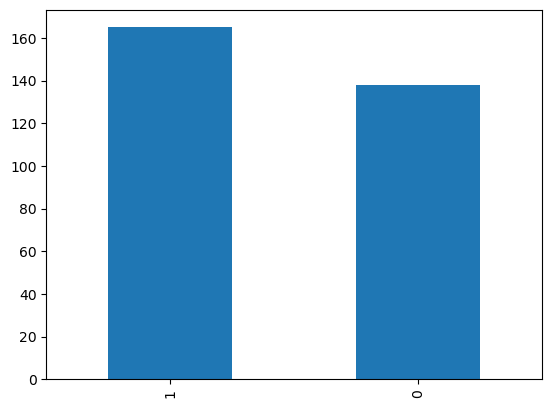

In [4]:
# visualize the target
df["target"].value_counts().plot(kind="bar")

In [5]:
# explore other features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# check for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
# Compare different columns with eachother 

pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


### Age vs Max heart rate (thalach) for target

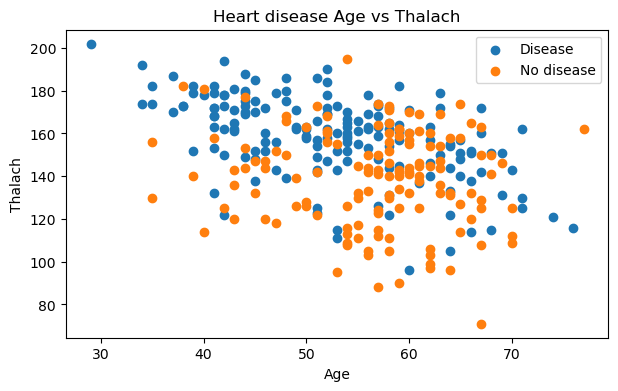

In [8]:
plt.figure(figsize=(7,4))

# plot for positive values (Have heart disease)
plt.scatter(df.age[df.target==1],df.thalach[df.target==1])

# plot for negative (Dont have heart disease)
plt.scatter(df.age[df.target==0], df.thalach[df.target==0])

plt.title("Heart disease Age vs Thalach")
plt.xlabel("Age")
plt.ylabel("Thalach")
plt.legend(["Disease", "No disease"]);

<AxesSubplot: ylabel='Frequency'>

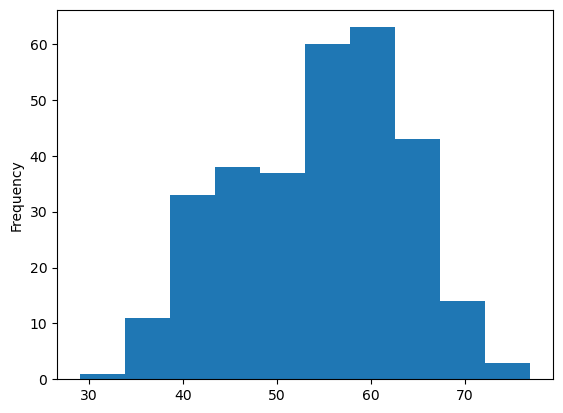

In [9]:
# check spread/distribution of data
df.age.plot.hist()

In [10]:
# compare with different type of chest pain

pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


Text(0, 0.5, 'Number of patients')

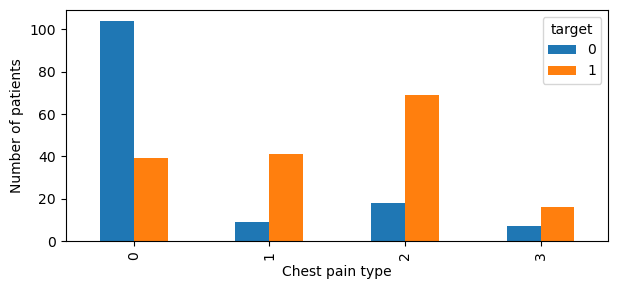

In [11]:
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(7,3));
plt.xlabel("Chest pain type")
plt.ylabel("Number of patients")

(14.5, -0.5)

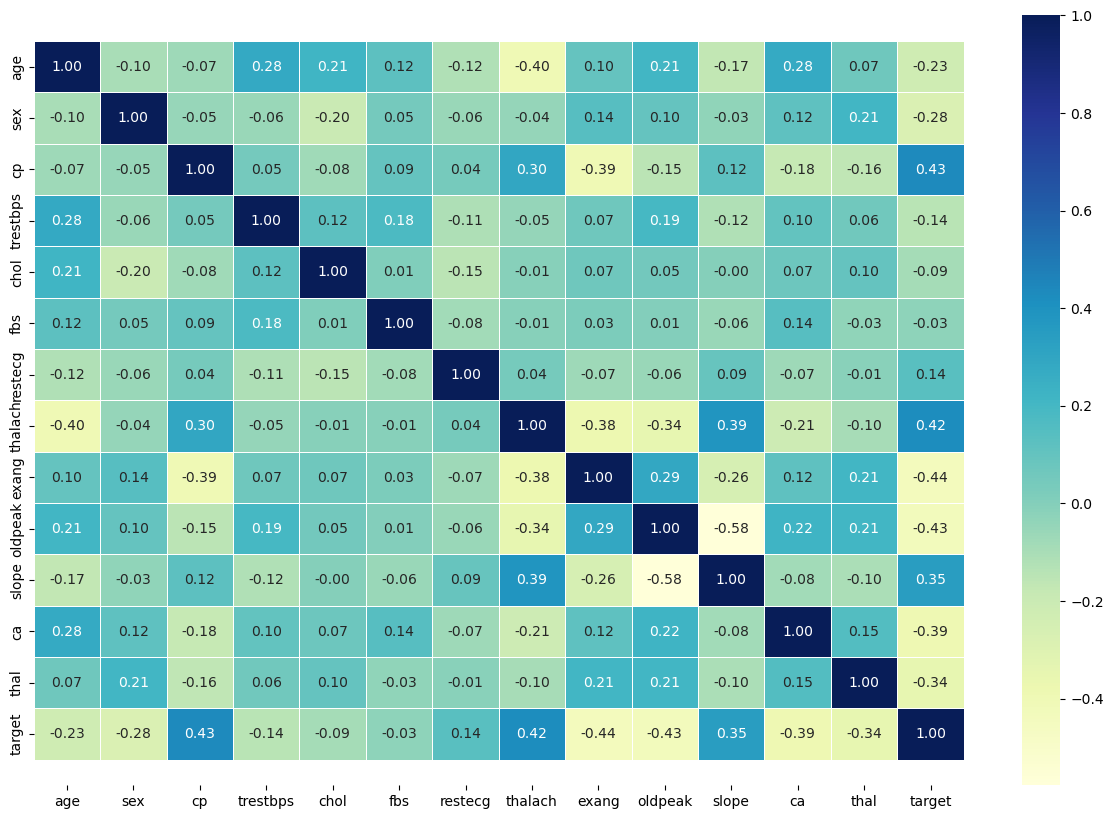

In [12]:
# Making a correlation matrix

corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")

bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

## 5. Modelling

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
# Splot data into X and Y

X = df.drop("target", axis=1)
y = df["target"]

(X.shape,y.shape)

((303, 13), (303,))

In [15]:
# set up a random seed
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [16]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

In [17]:
# Build a ML model / Choose an efficient model referring the scikit learn HTML file

models = {"Logistic reg": LogisticRegression(),
            "KNN": KNeighborsClassifier(),
             "RFC": RandomForestClassifier()}

# Create a function to fit and score models

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores


In [18]:
model_scores = fit_and_score(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
model_scores

C:\Users\akash\Documents\ML_course_projects\heart-disease-predictor\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic reg': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RFC': 0.8360655737704918}

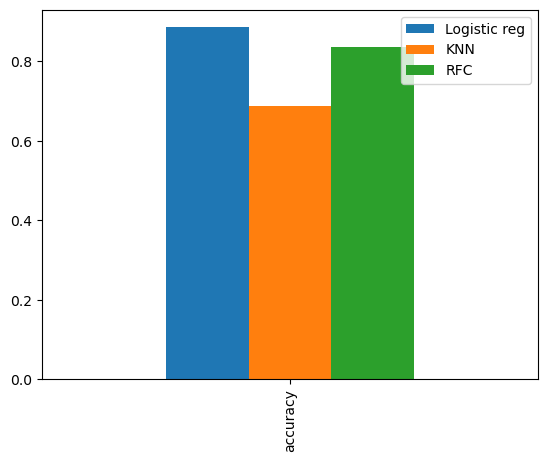

In [19]:

model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.plot(kind="bar");

## Improving the model

In [20]:
# improving KNN

train_scores = []
test_scores = []

neighbors = range(1,21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))
    
print(f'Maximum acore for knn on test data is {max(test_scores)*100:.2f}%')

Maximum acore for knn on test data is 75.41%


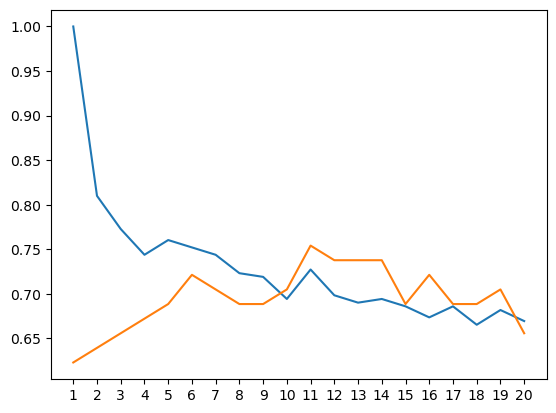

In [21]:
plt.plot(neighbors, train_scores, label="Train score");
plt.plot(neighbors, test_scores, label="test score");
plt.xticks(np.arange(1,21,1));

In [22]:
# Tuning params for Logistic regression and Randomforestclassifier

grid_lr = {"C": np.logspace(-4,4,20),
              "solver": ["liblinear"]}

grid_rf = {"n_estimators": np.arange(10,1000,50),
              "max_depth": [None, 3,5,10],
              "min_samples_split": np.arange(2,10,2),
              "min_samples_leaf": np.arange(1,20,2)}

In [23]:
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=grid_lr, cv=5, n_iter=20, verbose=True)

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [24]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [25]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [26]:
# Tuning RFC

np.random.seed(42)

rs_rfc = RandomizedSearchCV(RandomForestClassifier(), param_distributions=grid_rf, cv=5, n_iter=20, verbose=True)

rs_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([2, 4, 6, 8]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [29]:
rs_rfc.best_params_

{'n_estimators': 110,
 'min_samples_split': 6,
 'min_samples_leaf': 17,
 'max_depth': 3}

In [30]:
rs_rfc.score(X_test, y_test)

0.8852459016393442

## Hyperparameter tuning using GridSearchCV

In [32]:
log_reg_grid = {"C": np.logspace(-4,4,30),
                   "solver": ["liblinear"]}

gfs_log_reg = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid, cv=5, verbose=True)


gfs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [33]:
gfs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [35]:
gfs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluating beyond Accuracy

- ROC curve and AUC score
- Confusion matrix
- Classification report
- Precision
- Recall
- F1 score

In [37]:
# Make predictions using trained model

y_preds = gfs_log_reg.predict(X_test)

In [38]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [40]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

C:\Users\akash\Documents\ML_course_projects\heart-disease-predictor\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


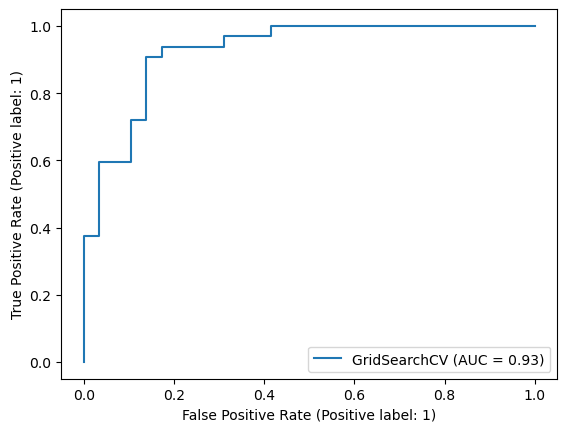

In [43]:
# Plot ROC curve

plot_roc_curve(gfs_log_reg, X_test, y_test);

In [45]:
# confusion matrix

confusion_matrix(y_test, y_preds)

array([[25,  4],
       [ 3, 29]], dtype=int64)

In [48]:
sns.set(font_scale=1.5)

def plot_conf_matrix(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(4,4))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

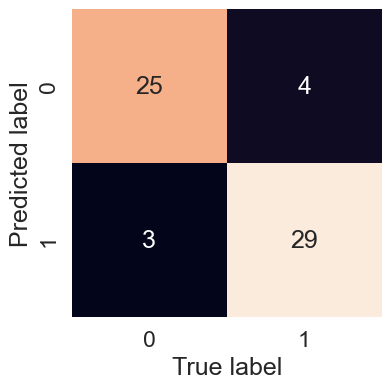

In [49]:
plot_conf_matrix(y_test, y_preds)

In [50]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Create evaluation metrics using cross-validation



In [52]:
# Check best hyperparameters
gfs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [54]:
# Create new model with best params
clf = LogisticRegression(C=20433597178569418, solver="liblinear")

In [55]:
cv_acc= cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc

array([0.80327869, 0.8852459 , 0.81967213, 0.86666667, 0.76666667])

In [56]:
np.mean(cv_acc)

0.8283060109289618

In [57]:
# Cross validation precision
cv_prec = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_prec = np.mean(cv_prec)
cv_prec

0.8230422730422731

In [58]:
# Cross validation recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.8787878787878787

In [59]:
# Cross validation f1_score
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8485836385836386

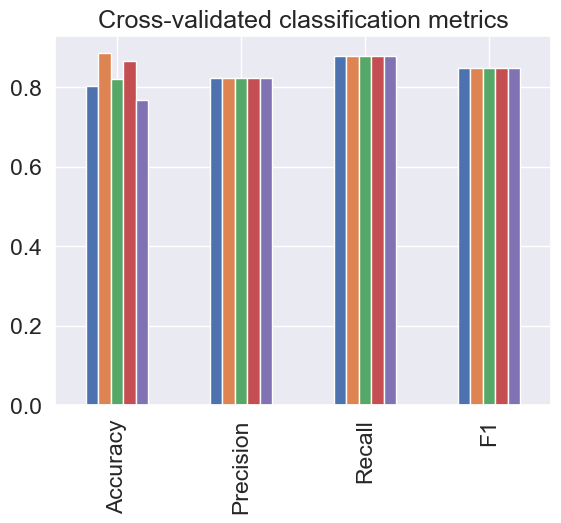

In [85]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_prec,
                           "Recall": cv_recall,
                           "F1": cv_f1})

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

## Feature Importance

In [86]:
# fit an instance of Logistic Regression

clf = LogisticRegression(C=20433597178569418, solver="liblinear")

clf.fit(X_train, y_train)

LogisticRegression(C=20433597178569418, solver='liblinear')

In [88]:
# Check coef_
clf.coef_

array([[-0.00864233, -1.797172  ,  0.85834375, -0.01759451, -0.00381612,
         0.29322437,  0.58308719,  0.01886874, -1.16744288, -0.65270638,
         0.76981435, -0.85543617, -0.99799284]])

In [89]:
# Match coef of features to columns

feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': -0.008642329274353482,
 'sex': -1.79717200361419,
 'cp': 0.8583437451133322,
 'trestbps': -0.01759451222269561,
 'chol': -0.0038161191638465554,
 'fbs': 0.2932243669093357,
 'restecg': 0.5830871890063735,
 'thalach': 0.01886874240794657,
 'exang': -1.1674428773717258,
 'oldpeak': -0.6527063808130084,
 'slope': 0.7698143521344968,
 'ca': -0.8554361673292277,
 'thal': -0.9979928430866665}

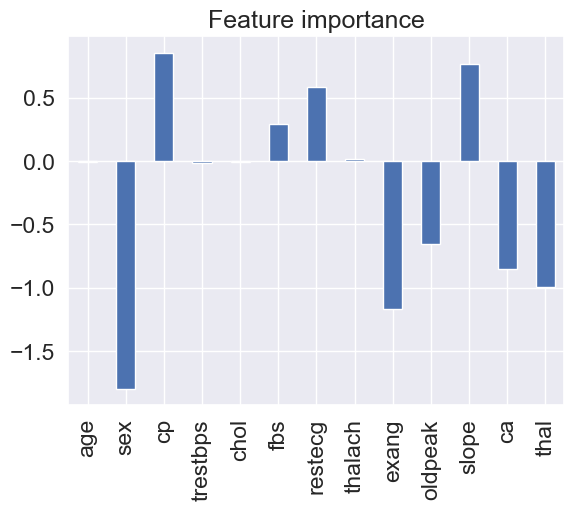

In [93]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature importance", legend=False);